In [2]:
#To calculate the execution time of the notebook
import timeit
start_time = timeit.default_timer()


#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [3]:
#Set Input File path
file_path='C:\\Users\\Raviraj Kuber\\Documents\\IIITB\\Telecom Case Study\\telecom_churn_data.csv'
#Load File
base_data=pd.read_csv(file_path)

In [4]:
base_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


**As per the Problem Statement, we require to identify the High Value Customers.Need to derive the Column Avg_Recharge for the** **Months of June & July,to identify the High Value Customers. Hence First we do the required derivations first, before performing Data Cleansing & Massaging Activities.**

**Columns Required** 

**1) total_rech_amt_6**

**2) total_rech_amt_7**

**3) total_rech_num_6**

**4) total_rech_num_7**

**5) total_rech_data_6**

**6) total_rech_data_7**


**EDA & Feature Engineering**

In [4]:
# Analyze only Columns for June(_6)
base_data['total_rech_amt_6'].isnull().sum()

0

In [5]:
base_data['total_rech_num_6'].isnull().sum()

0

In [6]:
base_data['total_rech_data_6'].isnull().sum()

74846

In [7]:
#It is observed that total_rech_num_6 & total_rech_amt_6 columns have no nulls values,while total_rech_data_6 has over 70% null values. There might be a possibility 
#that no net recharge was done for those numbers during the month.

# Analysing Data Volume Usage where total_rech_data_6 is null

base_data['vol_2g_mb_6'].loc[base_data['total_rech_data_6'].isnull()].unique()

array([0.])

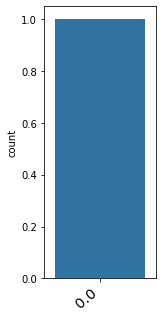

In [8]:
#Plotting Data Counts for vol_2g_mb_6
fig, axs = plt.subplots(1, figsize = (2,5))
plt1 = sns.countplot(base_data['vol_2g_mb_6'].loc[base_data['total_rech_data_6'].isnull()].unique())
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [9]:
base_data['vol_3g_mb_6'].loc[base_data['total_rech_data_6'].isnull()].unique()

array([0.])

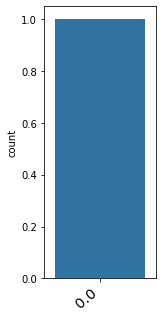

In [10]:
#Plotting Data Counts for vol_3g_mb_6
fig, axs = plt.subplots(1, figsize = (2,5))
plt1 = sns.countplot(base_data['vol_3g_mb_6'].loc[base_data['total_rech_data_6'].isnull()].unique())
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [11]:
#Imputing Missing Values in total_rech_data_6 with 0.
base_data['total_rech_data_6']= base_data['total_rech_data_6'].replace(np.nan, 0)

In [12]:
# Analyze only Columns for July(_7)
base_data['total_rech_amt_7'].isnull().sum()

0

In [13]:
# Analyze only Columns for July(_7)
base_data['total_rech_num_7'].isnull().sum()

0

In [14]:
# Analyze only Columns for July(_7)
base_data['total_rech_data_7'].isnull().sum()

74428

In [15]:
#It is observed that total_rech_num_7 & total_rech_amt_7 columns have no nulls values,
#while total_rech_data_7 has over 70% null values. There might be a possibility that no net recharge was 
# done for those numbers during the month.

# Analysing Data Volume Usage where total_rech_data_7 is null

base_data['vol_2g_mb_7'].loc[base_data['total_rech_data_7'].isnull()].unique()

array([0.])

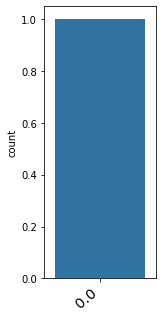

In [16]:
#Plotting Data Counts for vol_2g_mb_7
fig, axs = plt.subplots(1, figsize = (2,5))
plt1 = sns.countplot(base_data['vol_2g_mb_7'].loc[base_data['total_rech_data_7'].isnull()].unique())
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [17]:
# Analyze only Columns for July(_7)
base_data['vol_3g_mb_7'].loc[base_data['total_rech_data_7'].isnull()].unique()

array([0.])

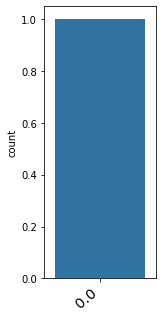

In [18]:
#Plotting Data Counts for vol_3g_mb_7
fig, axs = plt.subplots(1, figsize = (2,5))
plt1 = sns.countplot(base_data['vol_3g_mb_7'].loc[base_data['total_rech_data_7'].isnull()].unique())
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

**From tbe abvoe analysis it can be seen that where ever data is missing in total_rech_data_7, 
corresponding column data for vol_2g_mb_7 & vol_3g_mb_7 are 0. This indicates that no recharcge has been done.
Hence the missing values in total_rech_data_7 can be imputed with 0.**

In [19]:
#Imputing Missing Values in total_rech_data_7 with 0.
base_data['total_rech_data_7']= base_data['total_rech_data_7'].replace(np.nan, 0)

In [20]:
#Checking the Columns again
base_data['total_rech_data_7'].isnull().sum()

0

In [21]:
base_data['total_rech_data_6'].isnull().sum()

0

In [22]:
#Deriving the Column total_recharge_cd_6=total_rech_num_6+total_rech_data_6
base_data['total_recharge_cnt_6']=base_data['total_rech_num_6']+base_data['total_rech_data_6']

In [23]:
#Basic Column Sanity
base_data['total_recharge_cnt_6'].isnull().sum()

0

In [24]:
#Deriving the Column total_recharge_cnt_7=total_rech_num_7+total_rech_data_7
base_data['total_recharge_cnt_7']=base_data['total_rech_num_7']+base_data['total_rech_data_7']

In [25]:
#Basic Column Sanity
base_data['total_recharge_cnt_7'].isnull().sum()

0

In [26]:
#Some More Sanity Checks
base_data[(base_data['total_rech_amt_6'] ==0) & (base_data['total_rech_num_6']==0) ].head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_cnt_6,total_recharge_cnt_7
26,7000335166,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.01,...,1.0,1.0,1.0,766,0.00,0.00,0.00,0.00,0.0,7.0
91,7000160837,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,4.00,...,1.0,1.0,1.0,707,0.00,0.00,0.00,0.00,0.0,16.0
187,7000375019,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,37.50,...,1.0,1.0,1.0,219,0.00,0.00,0.00,0.00,0.0,4.0
198,7002122258,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,17.60,...,NaN,NaN,NaN,978,0.00,0.00,0.00,0.00,0.0,2.0
232,7000621478,109,NaN,NaN,NaN,6/30/2014,NaN,8/31/2014,NaN,0.70,...,NaN,NaN,NaN,671,0.00,0.00,0.00,0.00,0.0,0.0
263,7001241836,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.30,...,NaN,1.0,1.0,462,332.47,0.00,0.00,206.72,0.0,7.0
279,7002323802,109,NaN,NaN,NaN,6/30/2014,NaN,8/31/2014,NaN,0.90,...,NaN,NaN,NaN,663,0.00,0.00,0.00,0.00,0.0,0.0
371,7002229815,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.00,...,NaN,NaN,NaN,382,0.00,0.00,0.00,0.00,0.0,1.0
414,7000919353,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,20.00,...,1.0,1.0,1.0,429,0.00,0.00,0.00,0.00,0.0,12.0
431,7000599626,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,3.22,...,1.0,1.0,1.0,251,230.20,182.58,109.79,0.00,0.0,5.0


In [27]:
#Some More Sanity Checks
base_data[(base_data['total_rech_amt_7'] ==0) & (base_data['total_rech_num_7']==0) ].head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_cnt_6,total_recharge_cnt_7
52,7001419252,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.881,...,NaN,1.0,1.0,889,0.0,0.0,0.00,0.0,4.0,0.0
68,7000181022,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.000,...,NaN,NaN,NaN,335,0.0,0.0,0.00,0.0,1.0,0.0
121,7001904828,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,289.516,...,NaN,NaN,NaN,2888,0.0,0.0,0.00,0.0,4.0,0.0
130,7000562233,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,233.269,...,NaN,NaN,NaN,502,0.0,0.0,0.00,0.0,7.0,0.0
144,7000816313,109,0.0,0.0,0.0,6/30/2014,NaN,NaN,NaN,340.765,...,NaN,NaN,NaN,1179,0.0,0.0,0.00,0.0,2.0,0.0
201,7000669827,109,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,45.000,...,NaN,NaN,NaN,1069,0.0,0.0,0.00,0.0,1.0,0.0
202,7001788209,109,NaN,NaN,NaN,6/30/2014,NaN,NaN,NaN,126.339,...,NaN,NaN,NaN,925,0.0,0.0,0.00,0.0,1.0,0.0
216,7001320191,109,0.0,0.0,0.0,6/30/2014,NaN,NaN,NaN,44.550,...,NaN,NaN,NaN,2834,0.0,0.0,807.06,0.0,6.0,0.0
232,7000621478,109,NaN,NaN,NaN,6/30/2014,NaN,8/31/2014,NaN,0.700,...,NaN,NaN,NaN,671,0.0,0.0,0.00,0.0,0.0,0.0
275,7000464930,109,NaN,NaN,NaN,6/30/2014,NaN,NaN,NaN,90.208,...,NaN,NaN,NaN,318,0.0,0.0,0.00,0.0,1.0,0.0


In [28]:
#Calculating only Calling Recharge for the month of June(_6)
base_data['total_calling_rch_6']=(base_data['total_rech_amt_6']/base_data['total_recharge_cnt_6'])*base_data['total_rech_num_6']
base_data['total_calling_rch_6']=round(base_data['total_calling_rch_6'],2)

In [29]:
#Calculating only Data Recharge for the month of June(_6)
base_data['total_data_rch_6']=(base_data['total_rech_amt_6']/base_data['total_recharge_cnt_6'])*base_data['total_rech_data_6']
base_data['total_data_rch_6']=round(base_data['total_data_rch_6'],2)

In [30]:
#View Basic data for derived Columns for the month of June(_6)
base_data[['total_rech_amt_6','total_recharge_cnt_6','total_rech_num_6','total_calling_rch_6','total_rech_data_6','total_data_rch_6']].head()

,total_rech_amt_6,total_recharge_cnt_6,total_rech_num_6,total_calling_rch_6,total_rech_data_6,total_data_rch_6
0,362,5.0,4,289.60,1.0,72.40
1,74,4.0,4,74.00,0.0,0.00
2,168,5.0,5,168.00,0.0,0.00
3,230,10.0,10,230.00,0.0,0.00
4,196,6.0,5,163.33,1.0,32.67


In [31]:
#Calculating only Calling Recharge for the month of July(_7)
base_data['total_calling_rch_7']=(base_data['total_rech_amt_7']/base_data['total_recharge_cnt_7'])*base_data['total_rech_num_7']
base_data['total_calling_rch_7']=round(base_data['total_calling_rch_7'],2)

In [32]:
#Calculating only Data Recharge for the month of July(_7)
base_data['total_data_rch_7']=(base_data['total_rech_amt_7']/base_data['total_recharge_cnt_7'])*base_data['total_rech_data_7']
base_data['total_data_rch_7']=round(base_data['total_data_rch_7'],2)

In [33]:
#View Basic data for derived Columns for the month of July(_7)
base_data[['total_rech_amt_7','total_recharge_cnt_7','total_rech_num_7','total_calling_rch_7','total_rech_data_7','total_data_rch_7']].head()

,total_rech_amt_7,total_recharge_cnt_7,total_rech_num_7,total_calling_rch_7,total_rech_data_7,total_data_rch_7
0,252,4.0,3,189.0,1.0,63.0
1,384,10.0,9,345.6,1.0,38.4
2,315,4.0,4,315.0,0.0,0.0
3,310,11.0,11,310.0,0.0,0.0
4,350,6.0,6,350.0,0.0,0.0


In [34]:
#Calculating only Calling & Data Recharge for the month of August(_8)
base_data['total_rech_data_8']= base_data['total_rech_data_8'].replace(np.nan, 0)
base_data['total_recharge_cnt_8']=base_data['total_rech_num_8']+base_data['total_rech_data_8']
base_data['total_calling_rch_8']=(base_data['total_rech_amt_8']/base_data['total_recharge_cnt_8'])*base_data['total_rech_num_8']
base_data['total_calling_rch_8']=round(base_data['total_calling_rch_8'],2)

base_data['total_data_rch_8']=(base_data['total_rech_amt_8']/base_data['total_recharge_cnt_8'])*base_data['total_rech_data_8']
base_data['total_data_rch_8']=round(base_data['total_data_rch_8'],2)

In [35]:
base_data[['total_rech_num_7','total_rech_data_7','total_recharge_cnt_7']].head()

,total_rech_num_7,total_rech_data_7,total_recharge_cnt_7
0,3,1.0,4.0
1,9,1.0,10.0
2,4,0.0,4.0
3,11,0.0,11.0
4,6,0.0,6.0


In [36]:
#Calculating Average Recharge for the month of June & July= (Total_rch_June +Total_rch_July)/2
base_data['avg_rch_6_7']=(base_data['total_calling_rch_6']+base_data['total_calling_rch_7']+base_data['total_data_rch_6']+base_data['total_data_rch_7'])/2
base_data['avg_rch_6_7']=round(base_data['avg_rch_6_7'],2)

In [37]:
# Viewing all the Derived Columns
base_data[['total_rech_amt_6','total_recharge_cnt_6','total_rech_num_6','total_calling_rch_6','total_rech_data_6','total_data_rch_6','total_rech_amt_7','total_recharge_cnt_7','total_rech_num_7','total_calling_rch_7','total_rech_data_7','total_data_rch_7','avg_rch_6_7']].head()

,total_rech_amt_6,total_recharge_cnt_6,total_rech_num_6,total_calling_rch_6,total_rech_data_6,total_data_rch_6,total_rech_amt_7,total_recharge_cnt_7,total_rech_num_7,total_calling_rch_7,total_rech_data_7,total_data_rch_7,avg_rch_6_7
0,362,5.0,4,289.60,1.0,72.40,252,4.0,3,189.0,1.0,63.0,307.0
1,74,4.0,4,74.00,0.0,0.00,384,10.0,9,345.6,1.0,38.4,229.0
2,168,5.0,5,168.00,0.0,0.00,315,4.0,4,315.0,0.0,0.0,241.5
3,230,10.0,10,230.00,0.0,0.00,310,11.0,11,310.0,0.0,0.0,270.0
4,196,6.0,5,163.33,1.0,32.67,350,6.0,6,350.0,0.0,0.0,273.0


In [38]:
#Converting Mobile number to Varchar,so that it is not affected by Iterative imputer
base_data['mobile_number']=base_data.mobile_number.astype(str)

#Add ID column to base data.
base_data["ID"]=base_data.index+1000

In [39]:
#Analyzing Column fb_user_6
base_data['fb_user_6'].describe()

count    25153.000000
mean         0.914404
std          0.279772
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: fb_user_6, dtype: float64

In [40]:
#Analyzing Column fb_user_7
base_data['fb_user_7'].describe()

count    25571.000000
mean         0.908764
std          0.287950
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: fb_user_7, dtype: float64

In [41]:
#Analyzing Column fb_user_8
base_data['fb_user_8'].describe()

count    26339.000000
mean         0.890808
std          0.311885
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: fb_user_8, dtype: float64

In [42]:
#Analyszing the Above fb_user columns,it can be seen that they are Categorical in nature & contain heavy nulls.
#Hence Dropping these Columns

#Dropping Fb_user columns
base_data=base_data.drop(['fb_user_6','fb_user_7','fb_user_8'],axis=1)

In [43]:
#Analyzing Column night_pck_user_6
base_data['night_pck_user_6'].describe()

count    25153.000000
mean         0.025086
std          0.156391
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_6, dtype: float64

In [44]:
#Analyzing Column night_pck_user_6
base_data['night_pck_user_6'].isnull().sum()/len(base_data)

0.7484674846748467

In [45]:
#Analyzing Column night_pck_user_7
base_data['night_pck_user_7'].describe()

count    25571.000000
mean         0.023034
std          0.150014
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_7, dtype: float64

In [46]:
#Analyzing Column night_pck_user_7
base_data['night_pck_user_7'].isnull().sum()/len(base_data)

0.7442874428744287

In [47]:
#Analyzing Column night_pck_user_8
base_data['night_pck_user_8'].describe()

count    26339.000000
mean         0.020844
std          0.142863
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_8, dtype: float64

In [48]:
#Analyzing Column night_pck_user_8
base_data['night_pck_user_8'].isnull().sum()/len(base_data)

0.7366073660736607

In [49]:
#Analyszing the Above night_pck_user columns,it can be seen that they are Categorical in nature & contain heavy nulls.
#Hence Dropping these Columns

#Dropping Fb_user columns
base_data=base_data.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8'],axis=1)

In [50]:
#Implementing Iterative Imputer on Base Data, to fill up nulls
#Kindly note that the below code Takes approximately  60-75 Mins to run.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
numeric_columns = base_data.select_dtypes(include=[np.number])
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_columns)
base_data = pd.DataFrame(loans_imp_iter, columns=numeric_columns.columns)

#Converting Id Column to IND
base_data['ID']=base_data.ID.astype(int)


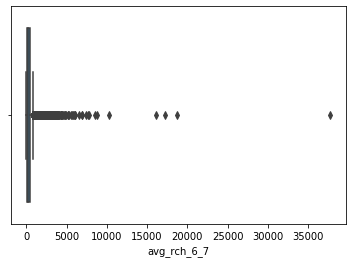

In [51]:
#View Boxplot for Average Recharge_6_7
sns.boxplot(base_data['avg_rch_6_7'])

In [52]:
#Idenfifying 70th %ile of Average Recharge.
avg_70_pile=base_data.avg_rch_6_7.quantile(.7)
avg_70_pile

368.5

In [53]:
#Filter Base Dataframe based on 70 %ile value derived, to get HVC
working_data_hvc=base_data[(base_data['avg_rch_6_7']>=avg_70_pile)]

In [54]:
#Length of Derived Dataframe
len(working_data_hvc)

30015

In [55]:
working_data_hvc.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,total_recharge_cnt_7,total_calling_rch_6,total_data_rch_6,total_calling_rch_7,total_data_rch_7,total_recharge_cnt_8,total_calling_rch_8,total_data_rch_8,avg_rch_6_7,ID
7,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,5.0,1580.0,0.0,790.00,0.00,7.0,3638.00,0.00,1185.0,1007
8,109.0,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,23.0,437.0,0.0,548.74,52.26,17.0,98.82,21.18,519.0,1008
13,109.0,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,4.0,507.0,0.0,253.00,0.00,14.0,563.36,153.64,380.0,1013
16,109.0,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,6.0,570.0,0.0,348.00,0.00,2.0,160.00,0.00,459.0,1016
17,109.0,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,2.0,816.0,0.0,0.00,0.00,4.0,30.00,0.00,408.0,1017


**From Above , the working_data_hvc Dataframe consists of the High Value Customers. Overall Dataframe size=30015 Records i.e. 
**The Organization has 30k High Value Customers, who generate Major Income for the Telecom Company**

**Identifying the Chrun Customers. Churn Customers Can be Indentifed using the following 4 Columns**

**1) total_ic_mou_9**

**2)total_og_mou_9**

**3)vol_2g_mb_9**

**4)vol_3g_mb_9**

**Analyzing these columns**


In [56]:
#Null Analysis on Incoming & Outgoing Calling Data
working_data_hvc[['total_ic_mou_9','total_og_mou_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
dtype: int64

In [57]:
# Minumum Value of Incoming & Outgoing Calling Data
working_data_hvc[['total_ic_mou_9','total_og_mou_9']].min()

total_ic_mou_9    0.0
total_og_mou_9    0.0
dtype: float64

In [58]:
#Null Analysis on 2g & 3g  Data
working_data_hvc[['vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

vol_2g_mb_9    0
vol_3g_mb_9    0
dtype: int64

In [59]:
# Minumum Value of 2g & 3g  Data
working_data_hvc[['vol_2g_mb_9','vol_3g_mb_9']].min()

vol_2g_mb_9    0.0
vol_3g_mb_9    0.0
dtype: float64

In [60]:
#From above analysis, it can be seen that All the four columns are not-null and do not require any imputation. Hence we can define
#churn as those customer , for whom all the above 4 columns are 0.0

In [61]:
#Count of Records that have Churned
len(working_data_hvc[(working_data_hvc['vol_2g_mb_9']==0.0) & (working_data_hvc['vol_3g_mb_9']==0.0) & 
                 ((working_data_hvc['total_ic_mou_9']==0.0) & (working_data_hvc['total_og_mou_9']==0.0))])

2597

In [62]:
#Assigning Value as 1 to Churn Cases
working_data_hvc.loc[(working_data_hvc['vol_2g_mb_9'] ==0.0) & (working_data_hvc['vol_3g_mb_9']==0.0)&(working_data_hvc['total_og_mou_9']==0.0) & (working_data_hvc['total_ic_mou_9']==0.0), 'churn'] = 1
#Assigning Values as 0 to Non-churn Cases
working_data_hvc['churn']= working_data_hvc['churn'].replace(np.nan, 0)

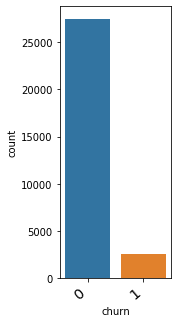

In [63]:
#Plotting Data Counts for Churn
fig, axs = plt.subplots(1, figsize = (2,5))
plt1 = sns.countplot(working_data_hvc['churn'].astype(int))
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [64]:
#Number of Churn Cases
len(working_data_hvc.loc[working_data_hvc['churn']==1])

2597

In [65]:
#Number of Non-Churn Cases
len(working_data_hvc.loc[working_data_hvc['churn']==0])

27418

In [66]:
#Converting Churn to int
working_data_hvc['churn']=working_data_hvc['churn'].astype(int)
#Dataset with Churn Values
working_data_hvc.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,total_calling_rch_6,total_data_rch_6,total_calling_rch_7,total_data_rch_7,total_recharge_cnt_8,total_calling_rch_8,total_data_rch_8,avg_rch_6_7,ID,churn
7,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,1580.0,0.0,790.00,0.00,7.0,3638.00,0.00,1185.0,1007,1
8,109.0,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,437.0,0.0,548.74,52.26,17.0,98.82,21.18,519.0,1008,0
13,109.0,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,507.0,0.0,253.00,0.00,14.0,563.36,153.64,380.0,1013,0
16,109.0,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,570.0,0.0,348.00,0.00,2.0,160.00,0.00,459.0,1016,0
17,109.0,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,816.0,0.0,0.00,0.00,4.0,30.00,0.00,408.0,1017,0


In [67]:
#List of Columns that are not required, since churn has been defined.
drop_col_list=list(working_data_hvc.filter(regex='_9'))
drop_col_list

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [68]:
#Dropping the columns
working_data_hvc = working_data_hvc[working_data_hvc.columns.drop(drop_col_list)]

In [69]:
#Final Working Dataframe
working_data_hvc.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_calling_rch_6,total_data_rch_6,total_calling_rch_7,total_data_rch_7,total_recharge_cnt_8,total_calling_rch_8,total_data_rch_8,avg_rch_6_7,ID,churn
7,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,1580.0,0.0,790.00,0.00,7.0,3638.00,0.00,1185.0,1007,1
8,109.0,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,437.0,0.0,548.74,52.26,17.0,98.82,21.18,519.0,1008,0
13,109.0,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,507.0,0.0,253.00,0.00,14.0,563.36,153.64,380.0,1013,0
16,109.0,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,570.0,0.0,348.00,0.00,2.0,160.00,0.00,459.0,1016,0
17,109.0,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,816.0,0.0,0.00,0.00,4.0,30.00,0.00,408.0,1017,0


In [70]:
len(working_data_hvc)

30015

In [71]:
#Exploratory Data Analysis

In [72]:
#Recharge Analysis for the Month of June
analysis_frame=pd.DataFrame({'KPI':['Total_Recharge_Overall_June'], 'Value': base_data['total_rech_amt_6'].sum()})
temp=pd.DataFrame({'KPI':['Total_Recharge_HVC_June'], 'Value':working_data_hvc['total_rech_amt_6'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])

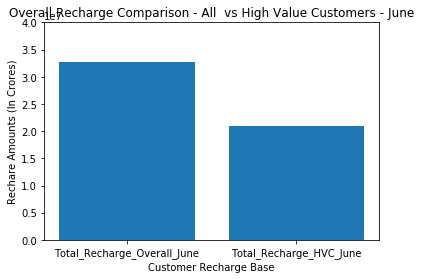

In [73]:
#Overall Analysis for Recharge Done for the Month of June- All Customers Vs High Value Customers
x=analysis_frame['KPI']
y=analysis_frame['Value']
y_pos = np.arange(len(y))
plt.bar(x, y)
plt.title('Overall Recharge Comparison - All  vs High Value Customers - June')
plt.xlabel('Customer Recharge Base')
plt.ylabel('Rechare Amounts (In Crores)')
plt.ylim(0,40000000)
plt.show()


In [74]:
temp= pd.DataFrame({'KPI':['%age Contribution of HVC to Total Recharge value - June'], 'Value':round((working_data_hvc['total_rech_amt_6'].sum()/base_data['total_rech_amt_6'].sum())*100,2)})
analysis_frame=pd.concat([analysis_frame,temp])
analysis_frame

,KPI,Value
0,Total_Recharge_Overall_June,32751134.00
0,Total_Recharge_HVC_June,20930660.00
0,%age Contribution of HVC to Total Recharge val...,63.91


In [75]:
#Recharge Analysis for the Month of July
analysis_frame=pd.DataFrame({'KPI':['Total_Recharge_Overall_July'], 'Value': base_data['total_rech_amt_7'].sum()})
temp=pd.DataFrame({'KPI':['Total_Recharge_HVC_July'], 'Value':working_data_hvc['total_rech_amt_7'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])

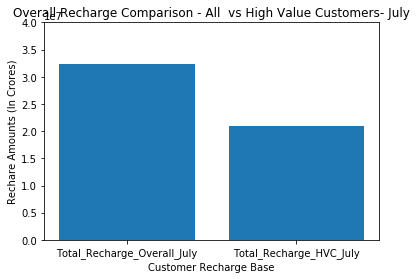

In [76]:
#Overall Analysis for Recharge Done for the Month of July- All Customers Vs High Value Customers
x=analysis_frame['KPI']
y=analysis_frame['Value']
y_pos = np.arange(len(y))
plt.bar(x, y)
plt.title('Overall Recharge Comparison - All  vs High Value Customers- July')
plt.xlabel('Customer Recharge Base')
plt.ylabel('Rechare Amounts (In Crores)')
plt.ylim(0,40000000)
plt.show()

In [77]:
temp= pd.DataFrame({'KPI':['%age Contribution of HVC to Total Recharge value - July'], 'Value':round((working_data_hvc['total_rech_amt_7'].sum()/base_data['total_rech_amt_7'].sum())*100,2)})
analysis_frame=pd.concat([analysis_frame,temp])
analysis_frame

,KPI,Value
0,Total_Recharge_Overall_July,32295974.00
0,Total_Recharge_HVC_July,20887143.00
0,%age Contribution of HVC to Total Recharge val...,64.67


In [78]:
#Recharge Analysis for the Month of August
analysis_frame=pd.DataFrame({'KPI':['Total_Recharge_Overall_August'], 'Value': base_data['total_rech_amt_8'].sum()})
temp=pd.DataFrame({'KPI':['Total_Recharge_HVC_August'], 'Value':working_data_hvc['total_rech_amt_8'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])

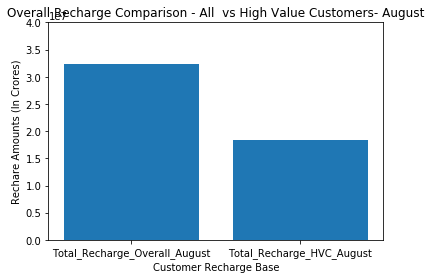

In [79]:
#Overall Analysis for Recharge Done for the Month of August- All Customers Vs High Value Customers
x=analysis_frame['KPI']
y=analysis_frame['Value']
y_pos = np.arange(len(y))
plt.bar(x, y)
plt.title('Overall Recharge Comparison - All  vs High Value Customers- August')
plt.xlabel('Customer Recharge Base')
plt.ylabel('Rechare Amounts (In Crores)')
plt.ylim(0,40000000)
plt.show()

In [80]:
temp= pd.DataFrame({'KPI':['%age Contribution of HVC to Total Recharge value - August'], 'Value':round((working_data_hvc['total_rech_amt_8'].sum()/base_data['total_rech_amt_8'].sum())*100,2)})
analysis_frame=pd.concat([analysis_frame,temp])
analysis_frame

,KPI,Value
0,Total_Recharge_Overall_August,32415388.00
0,Total_Recharge_HVC_August,18416359.00
0,%age Contribution of HVC to Total Recharge val...,56.81


**From Above analysis it can be seen that For the month of June & July HVC Contributes for nearly 64-65% of overall Recharges**
**while the same dropped to 57%  in the month of August.**

In [81]:
#View all Numeric Columns
working_data_hvc.select_dtypes(include=[np.number]).head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_calling_rch_6,total_data_rch_6,total_calling_rch_7,total_data_rch_7,total_recharge_cnt_8,total_calling_rch_8,total_data_rch_8,avg_rch_6_7,ID,churn
7,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,1580.0,0.0,790.00,0.00,7.0,3638.00,0.00,1185.0,1007,1
8,109.0,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,437.0,0.0,548.74,52.26,17.0,98.82,21.18,519.0,1008,0
13,109.0,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,507.0,0.0,253.00,0.00,14.0,563.36,153.64,380.0,1013,0
16,109.0,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,570.0,0.0,348.00,0.00,2.0,160.00,0.00,459.0,1016,0
17,109.0,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,816.0,0.0,0.00,0.00,4.0,30.00,0.00,408.0,1017,0


In [82]:
#Analyzing Column Circle_id
working_data_hvc['circle_id'].describe()

count    30015.0
mean       109.0
std          0.0
min        109.0
25%        109.0
50%        109.0
75%        109.0
max        109.0
Name: circle_id, dtype: float64

In [83]:
#Analyzing Column loc_og_t2o_mou
working_data_hvc['loc_og_t2o_mou'].describe()

count    30015.000000
mean         0.000002
std          0.000605
min         -0.024802
25%          0.000000
50%          0.000000
75%          0.000000
max          0.022535
Name: loc_og_t2o_mou, dtype: float64

In [84]:
#Analyzing Column std_og_t2o_mou
working_data_hvc['std_og_t2o_mou'].describe()

count    30015.000000
mean        -0.000005
std          0.000632
min         -0.024847
25%          0.000000
50%          0.000000
75%          0.000000
max          0.028380
Name: std_og_t2o_mou, dtype: float64

In [85]:
#Analyzing Column loc_ic_t2o_mou
working_data_hvc['loc_ic_t2o_mou'].describe()

count    30015.000000
mean        -0.000003
std          0.000669
min         -0.032884
25%          0.000000
50%          0.000000
75%          0.000000
max          0.027614
Name: loc_ic_t2o_mou, dtype: float64

In [86]:
#From Above Analysis, it can be seen that the columns have negligible variance.Hence these columns can be dropped.
working_data_hvc=working_data_hvc.drop(['loc_ic_t2o_mou','std_og_t2o_mou','loc_og_t2o_mou','circle_id'],axis=1)

In [87]:
#The Column avg_rch_6_7 was required only to find the HVC & it's value has been derived using the columns in the dataset. 
#Hence we can drop this column
working_data_hvc=working_data_hvc.drop(['avg_rch_6_7'],axis=1)

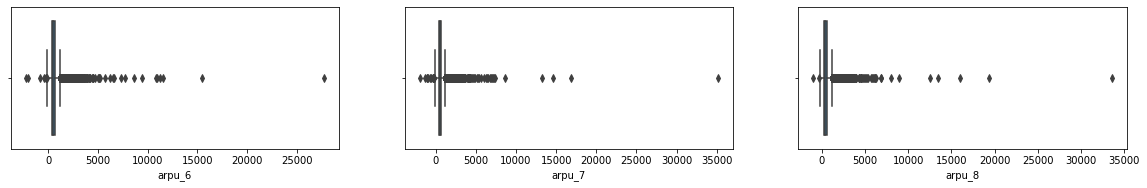

In [88]:
#Creating boxplot for outlier analysis
plt.figure(figsize = (20,12))
plt.subplot(4,3,1)
sns.boxplot(x ='arpu_6',data = working_data_hvc )
plt.subplot(4,3,2)
sns.boxplot(x ='arpu_7',data = working_data_hvc )
plt.subplot(4,3,3)
sns.boxplot(x ='arpu_8',data = working_data_hvc )

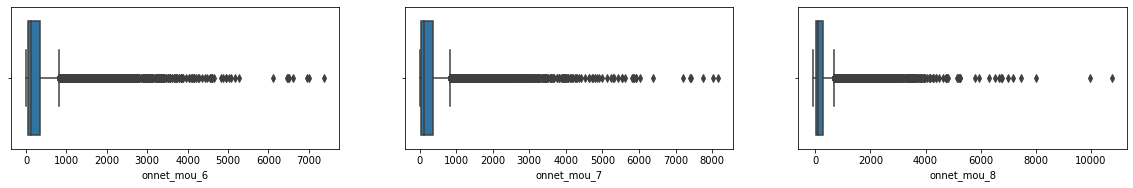

In [89]:
plt.figure(figsize = (20,12))
plt.subplot(4,3,1)
sns.boxplot(x ='onnet_mou_6',data = working_data_hvc )
plt.subplot(4,3,2)
sns.boxplot(x ='onnet_mou_7',data = working_data_hvc )
plt.subplot(4,3,3)
sns.boxplot(x ='onnet_mou_8',data = working_data_hvc )

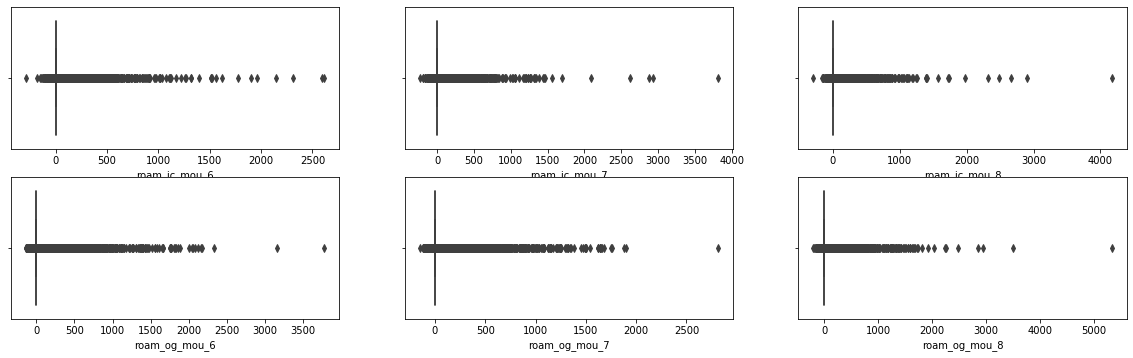

In [90]:
plt.figure(figsize = (20,12))
plt.subplot(4,3,1)
sns.boxplot(x ='roam_ic_mou_6',data = working_data_hvc )
plt.subplot(4,3,2)
sns.boxplot(x ='roam_ic_mou_7',data = working_data_hvc )
plt.subplot(4,3,3)
sns.boxplot(x ='roam_ic_mou_8',data = working_data_hvc )
plt.subplot(4,3,4)
sns.boxplot(x ='roam_og_mou_6',data = working_data_hvc )
plt.subplot(4,3,5)
sns.boxplot(x ='roam_og_mou_7',data = working_data_hvc )
plt.subplot(4,3,6)
sns.boxplot(x ='roam_og_mou_8',data = working_data_hvc )

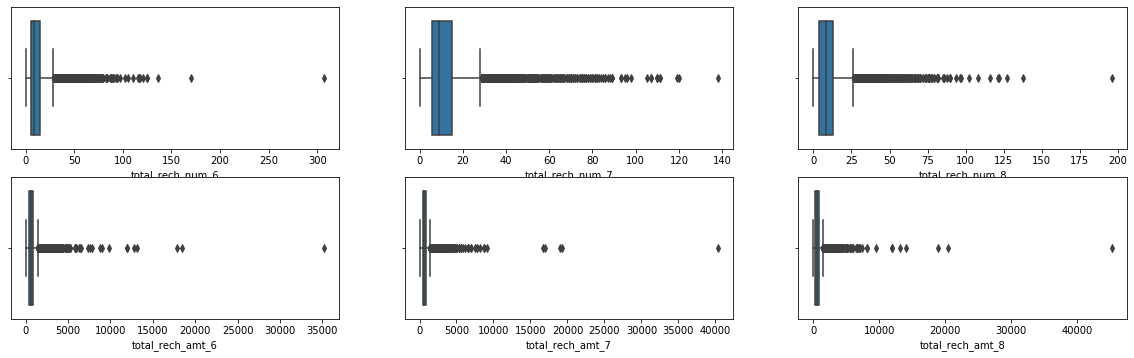

In [91]:
plt.figure(figsize = (20,12))
plt.subplot(4,3,1)
sns.boxplot(x ='total_rech_num_6',data = working_data_hvc )
plt.subplot(4,3,2)
sns.boxplot(x ='total_rech_num_7',data = working_data_hvc )
plt.subplot(4,3,3)
sns.boxplot(x ='total_rech_num_8',data = working_data_hvc )
plt.subplot(4,3,4)
sns.boxplot(x ='total_rech_amt_6',data = working_data_hvc )
plt.subplot(4,3,5)
sns.boxplot(x ='total_rech_amt_7',data = working_data_hvc )
plt.subplot(4,3,6)
sns.boxplot(x ='total_rech_amt_8',data = working_data_hvc )

In [92]:
#Treating Outliers
q1 = working_data_hvc['total_rech_amt_6'].quantile(0.05)
q3 = working_data_hvc['total_rech_amt_6'].quantile(0.95)
working_data_hvc = working_data_hvc[(working_data_hvc['total_rech_amt_6'] >= q1) & (working_data_hvc['total_rech_amt_6'] <= q3)]

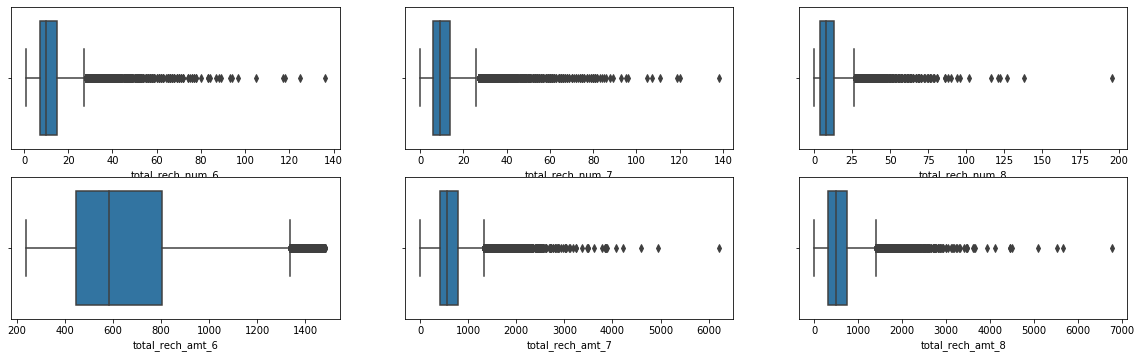

In [93]:
#Post Outlier Treatment
plt.figure(figsize = (20,12))
plt.subplot(4,3,1)
sns.boxplot(x ='total_rech_num_6',data = working_data_hvc )
plt.subplot(4,3,2)
sns.boxplot(x ='total_rech_num_7',data = working_data_hvc )
plt.subplot(4,3,3)
sns.boxplot(x ='total_rech_num_8',data = working_data_hvc )
plt.subplot(4,3,4)
sns.boxplot(x ='total_rech_amt_6',data = working_data_hvc )
plt.subplot(4,3,5)
sns.boxplot(x ='total_rech_amt_7',data = working_data_hvc )
plt.subplot(4,3,6)
sns.boxplot(x ='total_rech_amt_8',data = working_data_hvc )

In [94]:
len(working_data_hvc)

27053

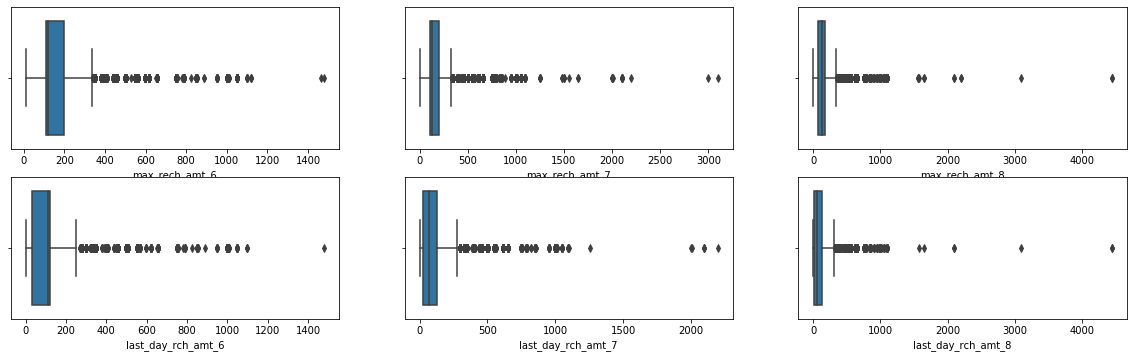

In [95]:
plt.figure(figsize = (20,12))
plt.subplot(4,3,1)
sns.boxplot(x ='max_rech_amt_6',data = working_data_hvc )
plt.subplot(4,3,2)
sns.boxplot(x ='max_rech_amt_7',data = working_data_hvc )
plt.subplot(4,3,3)
sns.boxplot(x ='max_rech_amt_8',data = working_data_hvc )
plt.subplot(4,3,4)
sns.boxplot(x ='last_day_rch_amt_6',data = working_data_hvc )
plt.subplot(4,3,5)
sns.boxplot(x ='last_day_rch_amt_7',data = working_data_hvc )
plt.subplot(4,3,6)
sns.boxplot(x ='last_day_rch_amt_8',data = working_data_hvc )

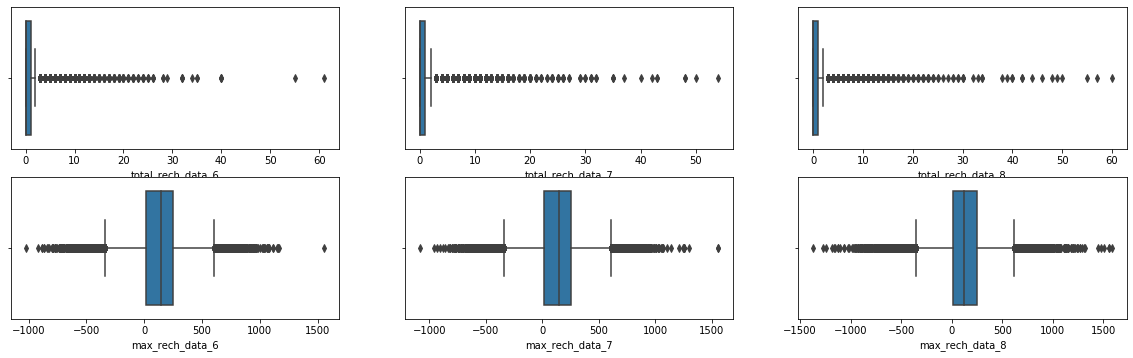

In [96]:
plt.figure(figsize = (20,12))
plt.subplot(4,3,1)
sns.boxplot(x ='total_rech_data_6',data = working_data_hvc )
plt.subplot(4,3,2)
sns.boxplot(x ='total_rech_data_7',data = working_data_hvc )
plt.subplot(4,3,3)
sns.boxplot(x ='total_rech_data_8',data = working_data_hvc )
plt.subplot(4,3,4)
sns.boxplot(x ='max_rech_data_6',data = working_data_hvc )
plt.subplot(4,3,5)
sns.boxplot(x ='max_rech_data_7',data = working_data_hvc )
plt.subplot(4,3,6)
sns.boxplot(x ='max_rech_data_8',data =working_data_hvc )

**Post Outlier Treatment, Number of Records Reduced by Almost 3000,but the data is much feasible to be used to PCA**
**& Other Analysis.**

In [97]:
#Some More EDA on Calling Data, of HVC Customers

#Roaming Incoming Minutes Analysis 

analysis_frame=pd.DataFrame({'KPI':['June'], 'Value': working_data_hvc['roam_ic_mou_6'].sum()})
temp=pd.DataFrame({'KPI':['July'], 'Value':working_data_hvc['roam_ic_mou_7'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])
temp=pd.DataFrame({'KPI':['August'], 'Value':working_data_hvc['roam_ic_mou_8'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])

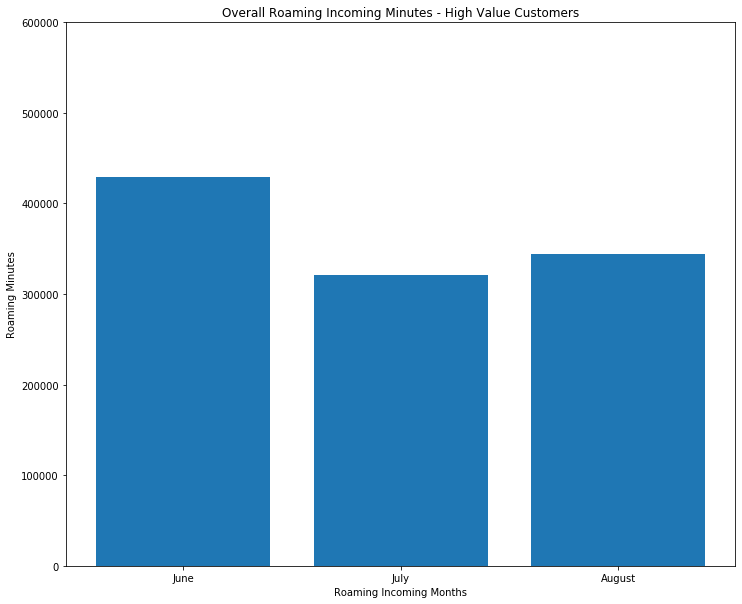

In [98]:
#Overall Analysis Roaming Incoming High Value Customers
x=analysis_frame['KPI']
y=analysis_frame['Value']
y_pos = np.arange(len(y))
plt.figure(figsize = (12,10))
plt.bar(x, y)
plt.title('Overall Roaming Incoming Minutes - High Value Customers')
plt.xlabel('Roaming Incoming Months')
plt.ylabel('Roaming Minutes')
plt.ylim(0,600000)
plt.show()

In [99]:
#Roaming Outgoing Analysis

analysis_frame=pd.DataFrame({'KPI':['June'], 'Value': working_data_hvc['roam_og_mou_6'].sum()})
temp=pd.DataFrame({'KPI':['July'], 'Value':working_data_hvc['roam_og_mou_7'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])
temp=pd.DataFrame({'KPI':['August'], 'Value':working_data_hvc['roam_og_mou_8'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])

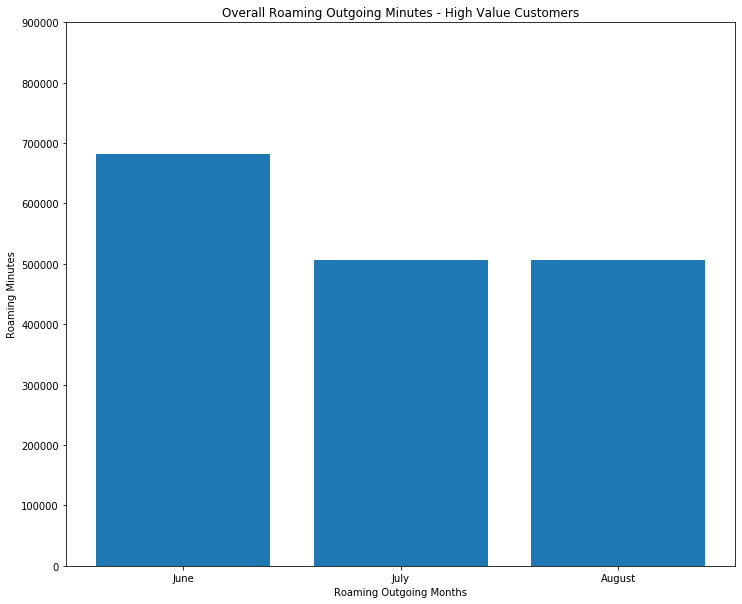

In [100]:
#Overall Analysis Roaming Outgoing High Value Customers
x=analysis_frame['KPI']
y=analysis_frame['Value']
y_pos = np.arange(len(y))
plt.figure(figsize = (12,10))
plt.bar(x, y)
plt.title('Overall Roaming Outgoing Minutes - High Value Customers')
plt.xlabel('Roaming Outgoing Months')
plt.ylabel('Roaming Minutes')
plt.ylim(0,900000)
plt.show()

In [101]:
#ISD Outgoing Minutes Analysis 
analysis_frame=pd.DataFrame({'KPI':['June'], 'Value': working_data_hvc['isd_og_mou_6'].sum()})
temp=pd.DataFrame({'KPI':['July'], 'Value':working_data_hvc['isd_og_mou_7'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])
temp=pd.DataFrame({'KPI':['August'], 'Value':working_data_hvc['isd_og_mou_8'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])

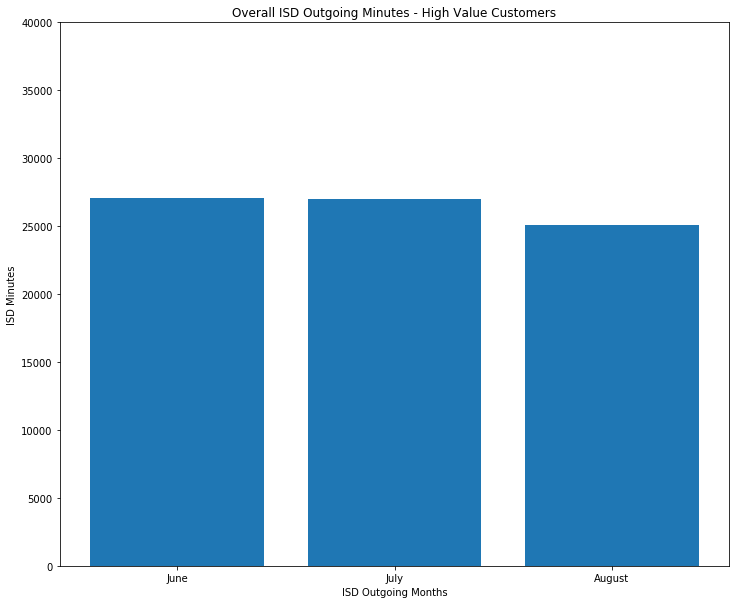

In [102]:
#Overall Analysis ISD Outgoing High Value Customers
x=analysis_frame['KPI']
y=analysis_frame['Value']
y_pos = np.arange(len(y))
plt.figure(figsize = (12,10))
plt.bar(x, y)
plt.title('Overall ISD Outgoing Minutes - High Value Customers')
plt.xlabel('ISD Outgoing Months')
plt.ylabel('ISD Minutes')
plt.ylim(0,40000)
plt.show()

In [103]:
#STD Outgoing Minutes Analysis 

analysis_frame=pd.DataFrame({'KPI':['June'], 'Value': working_data_hvc['std_og_mou_6'].sum()})
temp=pd.DataFrame({'KPI':['July'], 'Value':working_data_hvc['std_og_mou_7'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])
temp=pd.DataFrame({'KPI':['August'], 'Value':working_data_hvc['std_og_mou_8'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])

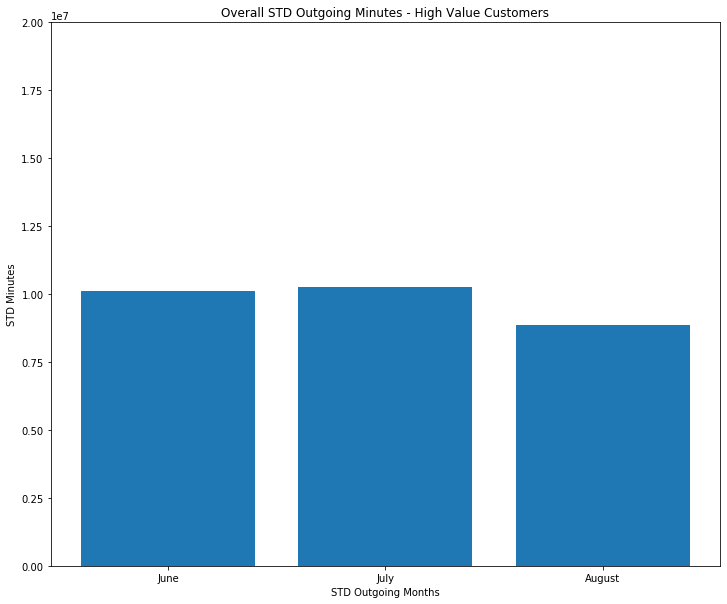

In [104]:
#Overall Analysis STD Outgoing High Value Customers
x=analysis_frame['KPI']
y=analysis_frame['Value']
y_pos = np.arange(len(y))
plt.figure(figsize = (12,10))
plt.bar(x, y)
plt.title('Overall STD Outgoing Minutes - High Value Customers')
plt.xlabel('STD Outgoing Months')
plt.ylabel('STD Minutes')
plt.ylim(0,20000000)
plt.show()

In [105]:
#Special Outgoing Minutes Analysis 

analysis_frame=pd.DataFrame({'KPI':['June'], 'Value': working_data_hvc['spl_og_mou_6'].sum()})
temp=pd.DataFrame({'KPI':['July'], 'Value':working_data_hvc['spl_og_mou_7'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])
temp=pd.DataFrame({'KPI':['August'], 'Value':working_data_hvc['spl_og_mou_8'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])

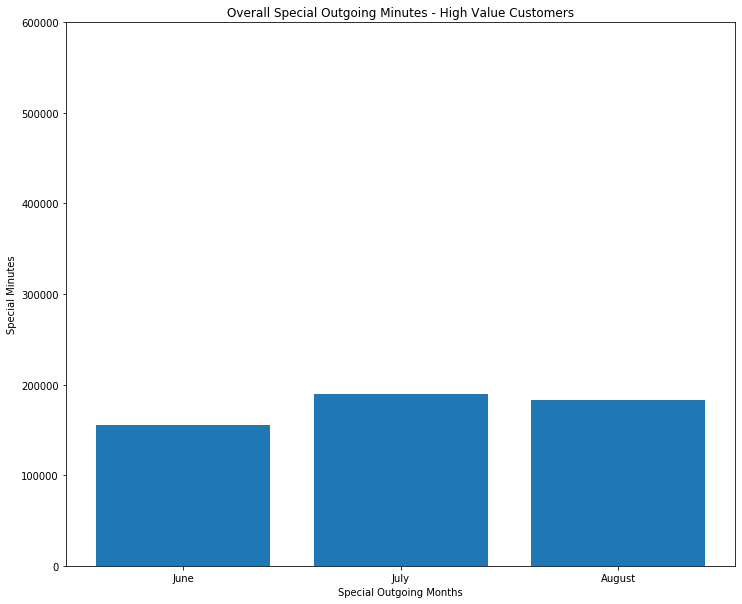

In [106]:
#Overall Analysis Special Outgoing High Value Customers
x=analysis_frame['KPI']
y=analysis_frame['Value']
y_pos = np.arange(len(y))
plt.figure(figsize = (12,10))
plt.bar(x, y)
plt.title('Overall Special Outgoing Minutes - High Value Customers')
plt.xlabel('Special Outgoing Months')
plt.ylabel('Special Minutes')
plt.ylim(0,600000)
plt.show()

In [107]:
#Average Revenue Per User(ARPU) Analysis 

analysis_frame=pd.DataFrame({'KPI':['June'], 'Value': working_data_hvc['arpu_6'].sum()})
temp=pd.DataFrame({'KPI':['July'], 'Value':working_data_hvc['arpu_7'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])
temp=pd.DataFrame({'KPI':['August'], 'Value':working_data_hvc['arpu_8'].sum()})
analysis_frame=pd.concat([analysis_frame,temp])

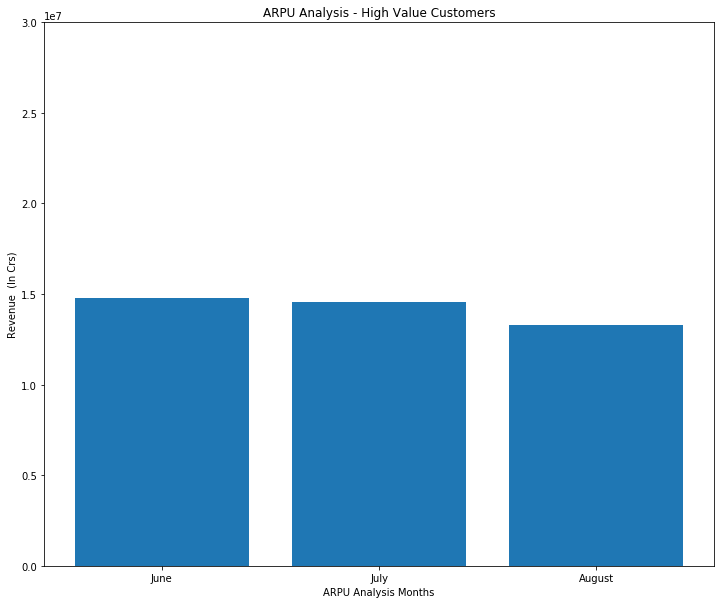

In [108]:
#Overall Analysis ARPU High Value Customers
x=analysis_frame['KPI']
y=analysis_frame['Value']
y_pos = np.arange(len(y))
plt.figure(figsize = (12,10))
plt.bar(x, y)
plt.title('ARPU Analysis - High Value Customers')
plt.xlabel('ARPU Analysis Months')
plt.ylabel('Revenue  (In Crs)')
plt.ylim(0,30000000)
plt.show()

**It can be seen that the Average Revenue Per User is almost same across the 3 Months, but slightly Higher in June & low in August**

**Recommendation Section-  From Above EDA,it can be observed that**

**1) For High Value Customers, it is seen that the STD Outgoing Calls are the Highest & is almost stable across all the 3 months.**
**The telecom company can roll out STD Packages for all these customers, to retain them.**

**2) Customers with ISD usageare also considerably high. Telecom company can identify such customers, and provide them with ISD**
**Packages.**

**3) ARPU is Highest for the Month of June, but it gradually goes down for the Month of July & August.If there were any Offers**
**rolled out in the month of June, the same should be continued for July & August, to avoid churn possibility.**

**4) After STD,Roaming Usage is higher. Telecom Company can roll out Roaming Packages for such customers.**

**5) On an whole, it can be seen that Customers are using More of Calling Features than Data Features. Hence rolling out offers based on Calling can help retain customers.**


In [109]:
# The columns total_rech_num_6,total_rech_num_7,total_rech_num_8 & total_rech_data_6,total_rech_data_7,total_rech_data_8
# have been used to derive the Total number of  recharges for the respective months. Hence these columns can be dropped,
#Since they will be repetitive in nature.

working_data_hvc=working_data_hvc.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8'],axis=1)
working_data_hvc=working_data_hvc.drop(['total_rech_num_6','total_rech_num_7','total_rech_num_8'],axis=1)

In [110]:
# Using the Total_Recharge_Amount, we have split the total recharge amount into Calling & Data Recharge Amount Respectively.
# Hence we can drop the Total_Recharge_Amount Columns for each month,Since they will be repetitive in nature. 
working_data_hvc=working_data_hvc.drop(['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],axis=1)

**Applying PCA**

In [111]:
#View Base Data
working_data_hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_recharge_cnt_7,total_calling_rch_6,total_data_rch_6,total_calling_rch_7,total_data_rch_7,total_recharge_cnt_8,total_calling_rch_8,total_data_rch_8,ID,churn
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,23.0,437.0,0.0,548.74,52.26,17.0,98.82,21.18,1008,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,4.0,507.0,0.0,253.00,0.00,14.0,563.36,153.64,1013,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,6.0,570.0,0.0,348.00,0.00,2.0,160.00,0.00,1016,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,2.0,816.0,0.0,0.00,0.00,4.0,30.00,0.00,1017,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,26.0,600.0,0.0,680.00,0.00,27.0,718.00,0.00,1021,0


In [112]:
# Preserving ID column & then dropping
id=working_data_hvc["ID"]
working_data_hvc_pca=working_data_hvc.drop('ID',axis=1)


In [113]:
working_data_hvc_pca.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_recharge_cnt_6,total_recharge_cnt_7,total_calling_rch_6,total_data_rch_6,total_calling_rch_7,total_data_rch_7,total_recharge_cnt_8,total_calling_rch_8,total_data_rch_8,churn
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,19.0,23.0,437.0,0.0,548.74,52.26,17.0,98.82,21.18,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,6.0,4.0,507.0,0.0,253.00,0.00,14.0,563.36,153.64,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,10.0,6.0,570.0,0.0,348.00,0.00,2.0,160.00,0.00,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,19.0,2.0,816.0,0.0,0.00,0.00,4.0,30.00,0.00,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,22.0,26.0,600.0,0.0,680.00,0.00,27.0,718.00,0.00,0


In [114]:
# Preserving Churn column & then dropping
chrun=working_data_hvc_pca["churn"]
working_data_hvc_pca=working_data_hvc_pca.drop('churn',axis=1)

In [115]:
working_data_hvc_pca.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sep_vbc_3g,total_recharge_cnt_6,total_recharge_cnt_7,total_calling_rch_6,total_data_rch_6,total_calling_rch_7,total_data_rch_7,total_recharge_cnt_8,total_calling_rch_8,total_data_rch_8
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.0,19.0,23.0,437.0,0.0,548.74,52.26,17.0,98.82,21.18
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0.0,6.0,4.0,507.0,0.0,253.00,0.00,14.0,563.36,153.64
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0.0,10.0,6.0,570.0,0.0,348.00,0.00,2.0,160.00,0.00
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0.0,19.0,2.0,816.0,0.0,0.00,0.00,4.0,30.00,0.00
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.0,22.0,26.0,600.0,0.0,680.00,0.00,27.0,718.00,0.00


In [116]:
# Putting feature variable to X
X=working_data_hvc_pca

# Putting response variable to y
y=chrun

In [117]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sep_vbc_3g,total_recharge_cnt_6,total_recharge_cnt_7,total_calling_rch_6,total_data_rch_6,total_calling_rch_7,total_data_rch_7,total_recharge_cnt_8,total_calling_rch_8,total_data_rch_8
4774,430.052,594.371,409.773,251.48,388.49,444.79,203.61,246.01,213.96,246.34,...,0.0,10.0,19.0,355.00,0.00,706.0,0.0,13.0,500.000000,0.000000
91524,673.003,468.881,565.594,1388.51,971.66,1016.53,53.16,84.33,81.99,0.00,...,0.0,17.0,14.0,796.00,0.00,526.0,0.0,10.0,666.000000,0.000000
90552,648.608,943.994,729.251,391.39,689.74,519.29,181.39,180.91,27.43,0.00,...,0.0,13.0,18.0,810.00,0.00,1050.0,0.0,19.0,1000.000000,0.000000
90204,692.539,188.762,1.000,143.86,103.68,3.73,1117.44,361.33,1.65,0.00,...,0.0,11.0,3.0,710.91,71.09,220.0,0.0,0.0,380.436733,-361.879684
92119,551.600,667.007,602.051,117.26,266.16,216.19,50.51,42.16,89.08,0.00,...,0.0,38.0,45.0,584.87,50.13,750.0,0.0,38.0,675.740000,18.260000


In [118]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sep_vbc_3g,total_recharge_cnt_6,total_recharge_cnt_7,total_calling_rch_6,total_data_rch_6,total_calling_rch_7,total_data_rch_7,total_recharge_cnt_8,total_calling_rch_8,total_data_rch_8
38480,465.920,396.943,187.438,492.08,137.81,99.74,232.43,202.36,142.98,0.0,...,0.0,19.0,17.0,530.00,0.00,378.82,81.18,8.0,240.62,34.38
11643,855.326,22.418,437.393,190.56,2.18,63.73,1985.23,15.19,1108.21,0.0,...,0.0,17.0,5.0,1006.00,0.00,30.00,0.00,11.0,586.00,0.00
43235,1039.020,628.295,684.291,116.04,23.23,23.38,213.59,32.91,36.64,0.0,...,0.0,19.0,8.0,847.74,391.26,543.00,181.00,11.0,658.18,246.82
7818,519.614,993.591,658.198,572.54,745.91,365.41,651.39,815.23,806.29,0.0,...,0.0,8.0,11.0,700.00,0.00,1526.36,152.64,3.0,993.00,0.00
22766,567.470,375.689,474.319,56.96,33.49,68.16,183.48,104.38,148.94,0.0,...,0.0,20.0,23.0,607.50,67.50,321.52,113.48,12.0,530.00,0.00


In [119]:
#Scaling data
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)

In [120]:
#Viewing Scaled Data
X_train

array([[-0.49711014,  0.19261642, -0.24523462, ...,  0.19621006,
        -0.06084597, -0.42617259],
       [ 0.52715948, -0.24257787,  0.22401777, ..., -0.10150875,
         0.39044436, -0.42617259],
       [ 0.42431135,  1.40509498,  0.71686815, ...,  0.79164769,
         1.29846225, -0.42617259],
       ...,
       [ 0.51075943,  0.44466428,  0.89147397, ...,  4.36427341,
         1.01300753, -0.42617259],
       [ 0.12018947,  0.03657557,  0.97282318, ...,  0.19621006,
         0.85951444,  1.08157024],
       [-1.80108284, -1.14976497, -0.52711853, ..., -1.09390478,
        -0.77944081, -2.75622834]])

In [121]:
# Class_Balance
100*y_train.value_counts(normalize=True)

0    91.841369
1     8.158631
Name: churn, dtype: float64

**It can be seen that the classes are not balanced. Hence we need to handle the Class Imbalance while training the Models.**

In [122]:
#Implementing PCA
pca = PCA(svd_solver = 'randomized', random_state = 42,n_components = 85)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=85, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [123]:
#IDentifying Value of Vectors Post PCA
pca.components_

array([[ 0.04893547,  0.06871945,  0.08944143, ..., -0.01681742,
         0.06703416,  0.09270873],
       [ 0.12579721,  0.15923241,  0.15080738, ...,  0.08520338,
         0.17017366, -0.03121721],
       [ 0.10386934,  0.17105531,  0.17303053, ...,  0.07961271,
         0.13210698,  0.18763884],
       ...,
       [ 0.02333982, -0.01100424, -0.09012703, ...,  0.07890328,
        -0.13527088,  0.17194618],
       [-0.06167947, -0.00573206,  0.08514203, ...,  0.03901865,
         0.04648365,  0.09873675],
       [ 0.0106074 ,  0.01853529,  0.01025677, ...,  0.02235542,
         0.02005994, -0.01913338]])

In [124]:
# Identifying the Variance Ratio of Components Post PCA
pca.explained_variance_ratio_

array([0.08142399, 0.07335903, 0.05485782, 0.03941729, 0.03675306,
       0.03202638, 0.02651877, 0.02363656, 0.02100106, 0.02057261,
       0.0196935 , 0.01918559, 0.01720291, 0.01673032, 0.0163861 ,
       0.01614863, 0.01544276, 0.01532402, 0.01441867, 0.013362  ,
       0.01250839, 0.01218564, 0.0114985 , 0.01132705, 0.01066133,
       0.01024424, 0.01011241, 0.00992322, 0.00963936, 0.00931868,
       0.00830677, 0.00817062, 0.00788817, 0.0076888 , 0.00759902,
       0.0073794 , 0.00722401, 0.00709805, 0.00688741, 0.00682338,
       0.00673033, 0.00649385, 0.006228  , 0.00601564, 0.00595954,
       0.00578784, 0.00570605, 0.00560249, 0.00557206, 0.00541622,
       0.00531092, 0.00522833, 0.00507844, 0.00493853, 0.00485448,
       0.00481436, 0.00470007, 0.00464679, 0.00447628, 0.00446584,
       0.0043827 , 0.00422857, 0.00417083, 0.0037582 , 0.0037064 ,
       0.00354269, 0.0034994 , 0.00348019, 0.00341276, 0.00333459,
       0.00326685, 0.00319116, 0.00311765, 0.0029911 , 0.00295

Text(0, 0.5, 'Cumulative Variance')

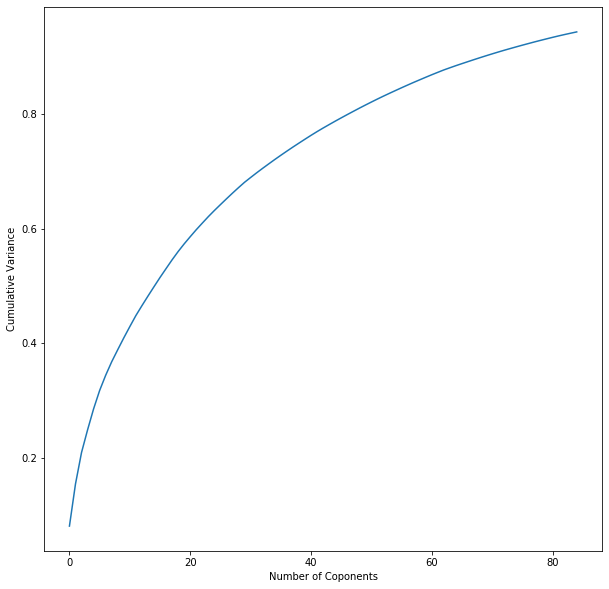

In [125]:
# Analyzing  the Scree Plot
fig = plt.figure(figsize = (10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

**From Above Plot, it can be seen that Approx First 40 Components give out 75% of variance**
**while approx next 40 Components give 10% Variance. Total of 85% Variance is given by Approx 80 components.**

In [126]:
## Implementing PCA using number of components=80 & Incremental PCA
pca_final = IncrementalPCA(n_components = 80)
df_pca = pca_final.fit_transform(X_train)
df_pca.shape

(18937, 80)

**Model-1 Decision Tree with PCA**

In [127]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [128]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.48      0.64      7466
           1       0.11      0.77      0.20       650

    accuracy                           0.50      8116
   macro avg       0.54      0.63      0.42      8116
weighted avg       0.89      0.50      0.60      8116



In [129]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[3582 3884]
 [ 147  503]]
0.5033267619517003


**From Above it can be seen that the Simple Decision Tree Might Tend to Overfit/Underfit,with Default Values.**
**Need to Perform Hyperparameter Tuning, to determine best fit values**

**Hyperparameter Tuning - Finding Max Depth**

In [130]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 15)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,  cv=n_folds,scoring="accuracy",return_train_score=True,n_jobs=4)

#View Tree Parameter Values
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=4, param_grid={'max_depth': range(1, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='acc

In [131]:
# scores of GridSearch CV
scores = tree.cv_results_
scores_df=pd.DataFrame(scores)

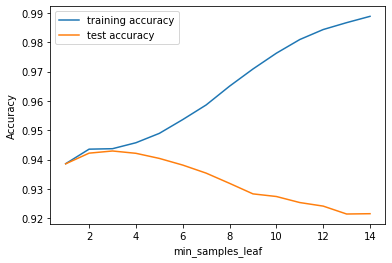

In [132]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [133]:
#View Scores for Max Depth
scores_df[['param_max_depth','mean_train_score','mean_test_score','rank_test_score']]

,param_max_depth,mean_train_score,mean_test_score,rank_test_score
0,1,0.938639,0.938586,5
1,2,0.943589,0.942229,2
2,3,0.943748,0.942969,1
3,4,0.945781,0.942177,3
4,5,0.948976,0.940434,4
5,6,0.953675,0.938163,6
6,7,0.958666,0.935417,7
7,8,0.965068,0.931932,8
8,9,0.970930,0.928341,9
9,10,0.976316,0.927444,10


**From Above Graph & Table it can be seen that after Max_Dept=5, the Test Score Drastically reducess while the training Scores drastically increase.**
**Hence the model tends to overfit after max_depth=5. Hence Optimum value for Max_depth=5**

**Hyperparameter Tuning - Finding min_samples_leaf**

In [134]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(75, 200, 25)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds,scoring="accuracy",return_train_score=True,n_jobs=4)

#View Tree Parameters
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=4,
             param_grid={'min_samples_leaf': range(75, 200, 25)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,

In [135]:
# scores of GridSearch CV
scores = tree.cv_results_
scores_df=pd.DataFrame(scores)

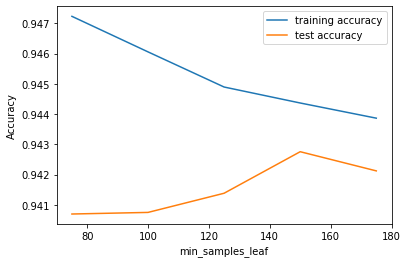

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#View Scores for min_Samples_leaf
scores_df[['param_min_samples_leaf','mean_train_score','mean_test_score','rank_test_score']]

**From Above Graph & Table it can be seen that for lower values of sample leaf, the model tends to Overfit.**
**After min_sample_leaf values of 125, both test & train scores start to converge.Hence, 125 is the optimum value for min_sample_leaf.**

**Hyperparameter Tuning- min_samples_split**

In [138]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 500, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score=True,n_jobs=4)

#View Tree Parameters
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=4,
             param_grid={'min_samples_split': range(5, 500, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,

In [139]:
# scores of GridSearch CV
scores = tree.cv_results_
scores_df=pd.DataFrame(scores)

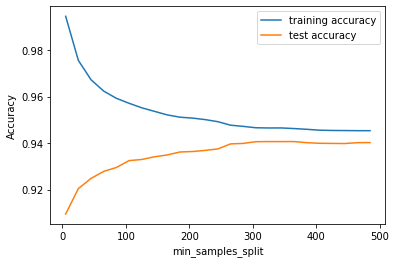

In [140]:
# plotting accuracies with param_min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [141]:
#View Scores for min_samples_split
scores_df[['param_min_samples_split','mean_train_score','mean_test_score','rank_test_score']]

,param_min_samples_split,mean_train_score,mean_test_score,rank_test_score
0,5,0.994508,0.909489,25
1,25,0.975564,0.920420,24
2,45,0.967233,0.924803,23
3,65,0.962349,0.927813,22
4,85,0.959246,0.929503,21
5,105,0.957108,0.932460,20
6,125,0.955167,0.932936,19
7,145,0.953649,0.934097,18
8,165,0.952131,0.934889,17
9,185,0.951141,0.936157,16


**From Above Graph & Table it can be seen that for lower values of sample leaf split , the model tends to Overfit.** 
**After min_sample_split values of 325, both test & train scores start to converge.Hence, 325 is the optimum value for min_sample_split.**

**Hyperparameter Tuning - Finding Best Values using automated GridSearch**

In [142]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(4, 12, 4),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(300, 400, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight = {0:.20,1:.80})
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,n_jobs=3)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   34.6s
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=3,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(4, 12, 4),
             

In [143]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
#cv_results

In [144]:
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Best Accuracy 0.9282885356709089
DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=350,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [145]:
# model with optimal hyperparameters- as per grid search cv. Adding Class_weight paramter to handle data imbalance scenario
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=325,class_weight = {0:.20,1:.80})
clf_gini.fit(X_train, y_train)

from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
report=classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      7466
           1       0.52      0.71      0.60       650

    accuracy                           0.92      8116
   macro avg       0.75      0.82      0.78      8116
weighted avg       0.94      0.92      0.93      8116



In [146]:
# confusion matrix
confusion = confusion_matrix(y_test,y_pred )


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
confusion

array([[7042,  424],
       [ 191,  459]], dtype=int64)

In [147]:
#Add SCores to DataFRame
Model_Report=pd.DataFrame({'Model':['Decision Tree with PCA'], 'Accuracy': round(report['accuracy'],2),'Recall':round((TP / float(TP+FN)),2)})


In [148]:
#View DataFrame
Model_Report

,Model,Accuracy,Recall
0,Decision Tree with PCA,0.92,0.71


**From above it can be seen that the values used for training the model, with class Imbalance handling, gives an accuracy of 92% &**
**Recall(Sensitivity) of 71%**

**Model 2 With PCA- Logistic Regression**

In [149]:
#Basic Logistic Regression Model
logmodelm = LogisticRegression()
print(logmodelm.fit(X_train,y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


**From Above-**

**1) Alpha (C)=1.0**

**2) class_weight=False (Data Imbalance Exists)**

**3) Penalty-l2 (Ridge Regression)**

In [150]:
#Predicting the Values
y_pred = logmodelm.predict(X_test)

In [151]:
#Confusion Matrix

#TP = confusion[1,1] # true positive 
#TN = confusion[0,0] # true negatives
#FP = confusion[0,1] # false positives
#FN = confusion[1,0] # false negatives

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[7383   83]
 [ 445  205]]


In [152]:
#Accuracy & Recall Values
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      7466
           1       0.71      0.32      0.44       650

    accuracy                           0.93      8116
   macro avg       0.83      0.65      0.70      8116
weighted avg       0.92      0.93      0.92      8116



**Although the Accuracy value of the model is high, the recall is low. This is due to Data Imbalance & Recall value of 0 is high,**
**which means there might be Overfitting in Training Data.**
**Need to implement Penalty & Data Imbalance Management Functions, to observe if the Model Performance Improves.**

In [153]:
#Defining Range Values for Grid Search
param_grid_dual_val=[True,False]
max_iter=[100,110,120,130,140,150]
alpha = [0.001,0.01,0.1,1.0,1.5,2.0,2.5]
param_grid = dict(dual=param_grid_dual_val,max_iter=max_iter,C=alpha)

In [154]:
#Running with GridSearch to find optimum Alpha Value & Penalty Type l2
lr = LogisticRegression(penalty='l2')
n_fold=3
grid = GridSearchCV (estimator=lr,param_grid=param_grid, cv = n_fold, n_jobs=4)
grid_result = grid.fit(X_train, y_train)

In [155]:
#Implementing Using Values received from GridSearch
lrm = LogisticRegression(C = 1.0,penalty='l2',class_weight='balanced')
print(lrm.fit(X_train,y_train))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [156]:
#Predicting From Above
y_prediction = lrm.predict(X_test)

In [157]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_prediction)
print(confusion_matrix)

[[6368 1098]
 [ 117  533]]


In [158]:
#Values Post Hyperparamter Tuning & Penalty & Data Imbalance Handling
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
report=classification_report(y_test, y_prediction, output_dict=True)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7466
           1       0.33      0.82      0.47       650

    accuracy                           0.85      8116
   macro avg       0.65      0.84      0.69      8116
weighted avg       0.93      0.85      0.88      8116



In [159]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_prediction)


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
confusion


array([[6368, 1098],
       [ 117,  533]], dtype=int64)

In [160]:
#Adding Logistic Regression L2 Score to Dataframe
temp=pd.DataFrame({'Model':['Logistic Regression L2 with PCA'], 'Accuracy': round(report['accuracy'],2),'Recall':round((TP / float(TP+FN)),2)})
Model_Report=pd.concat([Model_Report,temp])

In [161]:
#View Model Scores
Model_Report

,Model,Accuracy,Recall
0,Decision Tree with PCA,0.92,0.71
0,Logistic Regression L2 with PCA,0.85,0.82


In [162]:
#Repeating Above Process for Logistic Regression with L1 Regularization

lrm = LogisticRegression(C = 1.0,penalty='l1',solver="saga",class_weight='balanced')
print(lrm.fit(X_train,y_train))


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


In [163]:
#Predicting From Above
y_prediction = lrm.predict(X_test)

In [164]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_prediction)
print(confusion_matrix)

[[6385 1081]
 [ 115  535]]


In [165]:
#Values Post Hyperparamter Tuning & Penalty & Data Imbalance Handling
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
report=classification_report(y_test, y_prediction, output_dict=True)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      7466
           1       0.33      0.82      0.47       650

    accuracy                           0.85      8116
   macro avg       0.66      0.84      0.69      8116
weighted avg       0.93      0.85      0.88      8116



In [166]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_prediction)


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
confusion


array([[6385, 1081],
       [ 115,  535]], dtype=int64)

In [167]:
#Adding Logistic Regression L1 Score to Dataframe
temp=pd.DataFrame({'Model':['Logistic Regression L1 with PCA'], 'Accuracy': round(report['accuracy'],2),'Recall':round((TP / float(TP+FN)),2)})
Model_Report=pd.concat([Model_Report,temp])

In [168]:
#View Model Scores
Model_Report

,Model,Accuracy,Recall
0,Decision Tree with PCA,0.92,0.71
0,Logistic Regression L2 with PCA,0.85,0.82
0,Logistic Regression L1 with PCA,0.85,0.82


**Model 3 Random Forest with PCA**

In [169]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:.20,1:.80})
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.2, 1: 0.8},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [170]:
# Making predictions
predictions = rfc.predict(X_test)

In [171]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [172]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      7466
           1       0.79      0.24      0.36       650

    accuracy                           0.93      8116
   macro avg       0.87      0.62      0.66      8116
weighted avg       0.93      0.93      0.92      8116



In [173]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7426   40]
 [ 497  153]]


In [174]:
print(accuracy_score(y_test,predictions))

0.9338344011828487


**From Above analysis it is clear that there exists data imbalance & model performance is poor. Hence we need to implement**
**Hyperparameter tuning for Random Forest**

**Hyperparameter - Max Depth**

In [175]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,scoring="accuracy",return_train_score=True,n_jobs=6)

#View RF Fit Data
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [176]:
# scores of GridSearch CV
scores = rf.cv_results_
scores_df=pd.DataFrame(scores)

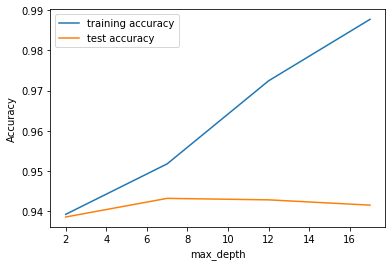

In [177]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [178]:
#View Scores for max_depth
scores_df[['param_max_depth','mean_train_score','mean_test_score','rank_test_score']]

,param_max_depth,mean_train_score,mean_test_score,rank_test_score
0,2,0.939140,0.938480,4
1,7,0.951721,0.943127,1
2,12,0.972422,0.942758,2
3,17,0.987749,0.941437,3


**From above chart & table that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease,indicating Overfitting**
**The ensemble tries to overfit as we increase the max_depth. Hence 7 can be consideredas optimal_value**

**Hyperparameter Tuning - n_estimators**

In [179]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score=True,n_jobs=6)

#View RF Fit Data
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [180]:
# scores of GridSearch CV
scores = rf.cv_results_
scores_df=pd.DataFrame(scores)

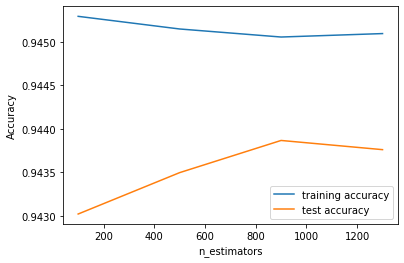

In [181]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [182]:
#View Scores for n_estimator
scores_df[['param_n_estimators','mean_train_score','mean_test_score','rank_test_score']]

,param_n_estimators,mean_train_score,mean_test_score,rank_test_score
0,100,0.945292,0.943022,4
1,500,0.945147,0.943497,3
2,900,0.945055,0.943867,1
3,1300,0.945094,0.943761,2


**Hyperparameter Tuning - max_features**

In [183]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8,12,14,16,20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score=True,n_jobs=6)
#View RF Fit Data
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [184]:
# scores of GridSearch CV
scores = rf.cv_results_
scores_df=pd.DataFrame(scores)

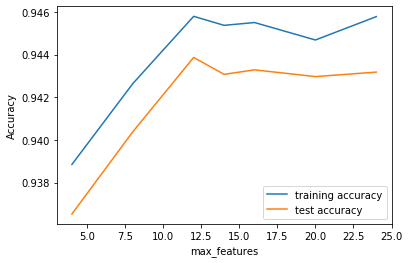

In [185]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [186]:
#View Scores for n_estimator
scores_df[['param_max_features','mean_train_score','mean_test_score','rank_test_score']]

,param_max_features,mean_train_score,mean_test_score,rank_test_score
0,4,0.938850,0.936526,7
1,8,0.942639,0.940381,6
2,12,0.945794,0.943867,1
3,14,0.945371,0.943074,4
4,16,0.945504,0.943286,2
5,20,0.944685,0.942969,5
6,24,0.945781,0.943180,3


**It can be seen that as the values of max features increase, the model tends to overfit. Hence lower values suit better.**

**Hyperparameter Tuning- min_samples_leaf**

In [187]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds, scoring="accuracy",return_train_score=True,n_jobs=6)
#View RF Fit Data
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [188]:
# scores of GridSearch CV
scores = rf.cv_results_
scores_df=pd.DataFrame(scores)

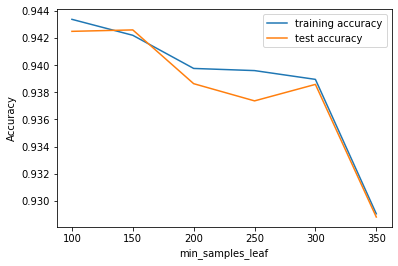

In [189]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [190]:
#View Scores for n_estimator
scores_df[['param_min_samples_leaf','mean_train_score','mean_test_score','rank_test_score']]

,param_min_samples_leaf,mean_train_score,mean_test_score,rank_test_score
0,100,0.943378,0.942494,2
1,150,0.942203,0.942599,1
2,200,0.939761,0.938639,3
3,250,0.939602,0.937371,5
4,300,0.938955,0.938586,4
5,350,0.929054,0.928817,6


**It can be observed that post 100, both Train & Test Values start Dropping.The Model tends to overfit at lower**
**values of min_sample leaf, and becomes less complex as the values increases.**

**Hyperparameter Tuning - min_samples_split**

In [191]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score=True,n_jobs=6)
#View RF Fit Data
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [192]:
# scores of GridSearch CV
scores = rf.cv_results_
scores_df=pd.DataFrame(scores)

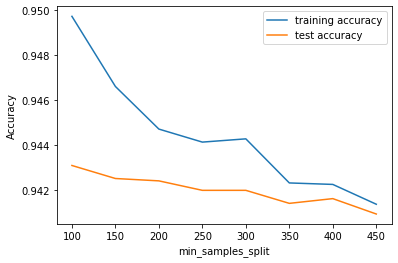

In [193]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [194]:
#View Scores for n_estimator
scores_df[['param_min_samples_split','mean_train_score','mean_test_score','rank_test_score']]

,param_min_samples_split,mean_train_score,mean_test_score,rank_test_score
0,100,0.949728,0.943074,1
1,150,0.946599,0.942494,2
2,200,0.944698,0.942388,3
3,250,0.944117,0.941965,4
4,300,0.944263,0.941965,4
5,350,0.942295,0.941385,7
6,400,0.942229,0.941596,6
7,450,0.941345,0.940909,8


**From Above it can be seen that Both Test & Training Scores are Maximum at 100 & then they start to Drop.The Model tends to overfit at lower values of min_sample split, and becomes less complex as the values increases.**

**Using GrdiSearchCV to Find Optimal Hyperparameters**

In [195]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = 6,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  9.5min
[Parallel(n_jobs=6)]: Done 216 out of 216 | elapsed: 11.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [196]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy- ',grid_search.best_score_,'Params- ',grid_search.best_params_)

Accuracy-  0.943602471352379 Params-  {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [197]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, max_depth=8,min_samples_leaf=100,min_samples_split=200,
                             max_features=10,n_estimators=100,class_weight='balanced')

In [198]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [199]:
# predict
predictions = rfc.predict(X_test)

In [200]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_test, y_prediction, output_dict=True)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7466
           1       0.31      0.78      0.45       650

    accuracy                           0.84      8116
   macro avg       0.64      0.82      0.68      8116
weighted avg       0.92      0.84      0.87      8116



In [201]:
print(confusion_matrix(y_test,predictions))

[[6340 1126]
 [ 141  509]]


In [202]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,predictions)


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
confusion

array([[6340, 1126],
       [ 141,  509]], dtype=int64)

In [203]:
#Adding Logistic Regression L1 Score to Dataframe
temp=pd.DataFrame({'Model':['Random Forest Ensemble with PCA'], 'Accuracy': round(report['accuracy'],2),'Recall':round((TP / float(TP+FN)),2)})
Model_Report=pd.concat([Model_Report,temp])

In [204]:
#View Model Scores
Model_Report

,Model,Accuracy,Recall
0,Decision Tree with PCA,0.92,0.71
0,Logistic Regression L2 with PCA,0.85,0.82
0,Logistic Regression L1 with PCA,0.85,0.82
0,Random Forest Ensemble with PCA,0.85,0.78


**Model 4 - Plain Logistic Regression**

In [205]:
#View Data
working_data_hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_recharge_cnt_7,total_calling_rch_6,total_data_rch_6,total_calling_rch_7,total_data_rch_7,total_recharge_cnt_8,total_calling_rch_8,total_data_rch_8,ID,churn
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,23.0,437.0,0.0,548.74,52.26,17.0,98.82,21.18,1008,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,4.0,507.0,0.0,253.00,0.00,14.0,563.36,153.64,1013,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,6.0,570.0,0.0,348.00,0.00,2.0,160.00,0.00,1016,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,2.0,816.0,0.0,0.00,0.00,4.0,30.00,0.00,1017,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,26.0,600.0,0.0,680.00,0.00,27.0,718.00,0.00,1021,0


In [206]:
#Store Target & Other Data into X & Y.
y=working_data_hvc["churn"]
X=working_data_hvc.drop(['ID','churn'],axis=1)

In [207]:
#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
#Get Column Names
x_cols_train=X_train.select_dtypes([np.number]).columns
x_cols_test=X_test.select_dtypes([np.number]).columns

In [209]:
## Scaling the train and test data
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train[x_cols_train] = scaler.fit_transform(X_train[x_cols_train])
X_test[x_cols_test] = scaler.transform(X_test[x_cols_test])

In [210]:
#Build & Fit Model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)
y_prediction = logmodel.predict(X_test)

In [211]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_prediction)
print(confusion_matrix)

[[4933   60]
 [ 264  154]]


In [212]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4993
           1       0.72      0.37      0.49       418

    accuracy                           0.94      5411
   macro avg       0.83      0.68      0.73      5411
weighted avg       0.93      0.94      0.93      5411



**From Above it can be seen that the model performance it too low. We can use Hyperparameter tuning Technique to improve performance** 

In [213]:
# With L1 Regularization
logmodel = LogisticRegression(penalty = 'l1' , solver = 'saga',class_weight='balanced')
logmodel.fit(X_train , y_train)

y_prediction = logmodel.predict(X_test)

In [214]:
#Confusion MAtrix for L1

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_prediction)
print(confusion_matrix)

[[4252  741]
 [  72  346]]


In [215]:
#Classification report
from sklearn.metrics import classification_report
report=classification_report(y_test, y_prediction, output_dict=True)
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      4993
           1       0.32      0.83      0.46       418

    accuracy                           0.85      5411
   macro avg       0.65      0.84      0.69      5411
weighted avg       0.93      0.85      0.88      5411



In [216]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_prediction)


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
confusion

array([[4252,  741],
       [  72,  346]], dtype=int64)

In [217]:
#Viewing the Co-efficients Values & identifying the top 10 Features
x_cols = X_train.columns.tolist()
coef = logmodel.coef_.squeeze().tolist()

final_coef_l1 = pd.DataFrame(list(zip(x_cols, coef)))
final_coef_l1.columns=['Feature','Co-efficient Value']

#Top 5 Predictors as per L1 Penalty
final_coef_l1.sort_values(by=['Co-efficient Value'],ascending=False).head(5)

,Feature,Co-efficient Value
2,arpu_8,0.444603
61,loc_ic_t2m_mou_7,0.409236
1,arpu_7,0.326886
118,vol_3g_mb_7,0.243393
98,max_rech_amt_8,0.239093


In [218]:
#Adding Logistic Regression L1 Score to Dataframe
temp=pd.DataFrame({'Model':['Logistic Regression L1 without PCA'], 'Accuracy': round(report['accuracy'],2),'Recall':round((TP / float(TP+FN)),2)})
Model_Report=pd.concat([Model_Report,temp])

In [219]:
#View Model Report
Model_Report

,Model,Accuracy,Recall
0,Decision Tree with PCA,0.92,0.71
0,Logistic Regression L2 with PCA,0.85,0.82
0,Logistic Regression L1 with PCA,0.85,0.82
0,Random Forest Ensemble with PCA,0.85,0.78
0,Logistic Regression L1 without PCA,0.85,0.83


In [220]:
# With L2 Regularization
logmodel = LogisticRegression(penalty = 'l2' ,class_weight='balanced')
logmodel.fit(X_train , y_train)

y_prediction = logmodel.predict(X_test)

In [221]:
#Confusion MAtrix for L2

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_prediction)
print(confusion_matrix)

[[4245  748]
 [  74  344]]


In [222]:
#Classification report L2
from sklearn.metrics import classification_report
report=classification_report(y_test, y_prediction, output_dict=True)
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      4993
           1       0.32      0.82      0.46       418

    accuracy                           0.85      5411
   macro avg       0.65      0.84      0.68      5411
weighted avg       0.93      0.85      0.88      5411



In [223]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_prediction)


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
confusion

array([[4245,  748],
       [  74,  344]], dtype=int64)

In [224]:
#Viewing the Co-efficients Values & identifying the top 10 Features
x_cols = X_train.columns.tolist()
coef = logmodel.coef_.squeeze().tolist()

final_coef_l2 = pd.DataFrame(list(zip(x_cols, coef)))
final_coef_l2.columns=['Feature','Co-efficient Value']

#Top 5 Predictors as per L1 Penalty
final_coef_l2.sort_values(by=['Co-efficient Value'],ascending=False).head(5)

,Feature,Co-efficient Value
2,arpu_8,0.729991
4,onnet_mou_7,0.708373
34,std_og_t2m_mou_7,0.614492
6,offnet_mou_6,0.512635
30,std_og_t2t_mou_6,0.495653


In [225]:
#Adding Logistic Regression L2 Score to Dataframe
temp=pd.DataFrame({'Model':['Logistic Regression L2 without PCA'], 'Accuracy': round(report['accuracy'],2),'Recall':round((TP / float(TP+FN)),2)})
Model_Report=pd.concat([Model_Report,temp])

In [226]:
#View Model Report
Model_Report

,Model,Accuracy,Recall
0,Decision Tree with PCA,0.92,0.71
0,Logistic Regression L2 with PCA,0.85,0.82
0,Logistic Regression L1 with PCA,0.85,0.82
0,Random Forest Ensemble with PCA,0.85,0.78
0,Logistic Regression L1 without PCA,0.85,0.83
0,Logistic Regression L2 without PCA,0.85,0.82


**Model Observations**

**1) Decision Tree with PCA has the highest Accuracy, but the Recall(Sensitivity) is lowest as compared to Other Models.**

**2) Logistic Regression with both L1 & L2 Penalty, have similar Recall(Sensitivity) & Accuracy.**

**3) Random Forest has Acceptable Values, for both Recall(Sensitivity) & Accuracy.**

**4) Logistic Regression without PCA are only to identify top features. Yet they can be considered for Optimum Model Race**

**Comparing the Scores, Logistic Regression Model with PCA (Either L1 or L2), can be preferred as Optimum Model.**

**But Considering, Random Forest handle Data Imbalance better,in this case, where data is heavily Imbalanced,this can also be preferred.**

In [227]:
#Top 10 Features as per l1 Penalty
final_coef_l1.sort_values(by=['Co-efficient Value'],ascending=False).head(10)

,Feature,Co-efficient Value
2,arpu_8,0.444603
61,loc_ic_t2m_mou_7,0.409236
1,arpu_7,0.326886
118,vol_3g_mb_7,0.243393
98,max_rech_amt_8,0.239093
67,loc_ic_mou_7,0.232454
85,total_ic_mou_7,0.202924
4,onnet_mou_7,0.201856
34,std_og_t2m_mou_7,0.174412
69,std_ic_t2t_mou_6,0.146639


In [228]:
#Top 10 Features as per L2 Penalty
final_coef_l2.sort_values(by=['Co-efficient Value'],ascending=False).head(10)

,Feature,Co-efficient Value
2,arpu_8,0.729991
4,onnet_mou_7,0.708373
34,std_og_t2m_mou_7,0.614492
6,offnet_mou_6,0.512635
30,std_og_t2t_mou_6,0.495653
1,arpu_7,0.492709
55,total_og_mou_7,0.436251
84,total_ic_mou_6,0.408007
82,std_ic_mou_7,0.381639
67,loc_ic_mou_7,0.375724


**From final_coef_l1 & final_coef_l2 it can be seen that arpu,outgoing minutes play a vital role in deciding if a customer will churn or not.**
**Also from EDA Recommendations,Outgoing calls on STD & ARPU play a vital. Hence the Telecom Company can roll out packages with respect to Calling**

In [229]:
elapsed = timeit.default_timer() - start_time
print('Elapsed Time in Minutes-', round((elapsed/60),0))

Elapsed Time in Minutes- 76.0
